<a href="https://colab.research.google.com/github/gapself/machine-learning/blob/main/natural-language-processing-projects/twitter_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NLP - ZUM **

In [ ]:
!python -m pip install spacy==2.3.2 -q

     |████████████████████████████████| 9.9 MB 1.2 MB/s 
     |████████████████████████████████| 2.1 MB 36.2 MB/s 


In [ ]:
!python -m spacy download pl_core_news_md

     |████████████████████████████████| 79.9 MB 1.4 MB/s 
  Created wheel for pl-core-news-md: filename=pl_core_news_md-2.3.0-py3-none-any.whl size=79999060 sha256=1ba57a0e69be063b73f233535cdbb4135a1711ed15a92174d36d66648fe54c9a
  Stored in directory: /tmp/pip-ephem-wheel-cache-durrd00y/wheels/69/69/49/eff1a839d507c3ad2da48a01d1d34dd3deae72d78776b4b5b1
Successfully built pl-core-news-md
✔ Download and installation successful
You can now load the model via spacy.load('pl_core_news_md')


### ❗❗ Uruchamiam znowu środowisko wykonawcze! ❗❗



##Sprawdzam połączenie z tweepy

In [ ]:
!pip install tweepy
import tweepy

In [ ]:
import spacy
# import potrzebnych bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

#nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download("punkt")

# system
import os
import shutil

# tf
import tensorflow as tf

#gensim
from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec

#wordcloud 
from wordcloud import WordCloud 

#filter warnings
import warnings
warnings.filterwarnings('ignore')


# model
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split

# preprocessing
import gensim
from gensim.utils import simple_preprocess

# ewaluacja
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# sklearn - modele do ML
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('./drive')

Mounted at ./drive


In [ ]:
%run ./drive/MyDrive/ZUM/my_keys.ipynb

## Authentication for Twitter API

In [ ]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

## Ściąganie tweetów po ID

In [ ]:
covid_id_tweets = pd.read_csv("/content/drive/MyDrive/ZUM/pl_covid_tweets_clean.txt", sep="\t", header=None)

In [ ]:
print(covid_id_tweets)

                          0           1         2     3              4
0                  tweet_id        date      time  lang  country_place
1       1219370546116407297  2020-01-20  21:26:07    pl            NaN
2       1220355028961103872  2020-01-23  14:38:06    pl            NaN
3       1221099475982323712  2020-01-25  15:56:16    pl            NaN
4       1221232003393167360  2020-01-26  00:42:53    pl            NaN
...                     ...         ...       ...   ...            ...
583801  1414043803485409285  2021-07-11  02:08:09    pl            NaN
583802  1414043861954015232  2021-07-11  02:08:23    pl            NaN
583803  1414049377589645315  2021-07-11  02:30:18    pl            NaN
583804  1414064422453137411  2021-07-11  03:30:05    pl            NaN
583805  1414064490786734081  2021-07-11  03:30:21    pl            NaN

[583806 rows x 5 columns]


In [ ]:
covid_id_tweets.shape

(583806, 5)

In [ ]:
covid_id_tweets_list = covid_id_tweets[0][1:].tolist()

In [ ]:
print(covid_id_tweets_list[0])

1219370546116407297


In [ ]:
import time
list_100 = list()
for i in range(0,len(covid_id_tweets_list), 100):
  list_100.append(covid_id_tweets_list[i:i+100])
print(len(list_100))

from tqdm import tqdm
tweets_list =[]
for portion in tqdm(list_100):
  while True:
    try:
      r = api.statuses_lookup(portion)
      break
    except:
      time.sleep(1) 
  for tweet in r:
    tweets_list.append(tweet.text)

5839


100%|██████████| 5839/5839 [1:33:26<00:00,  1.04it/s]


In [ ]:
print(len(tweets_list))

In [ ]:
print(tweets_list[0])

Kiedy #coronavirus dotrze do Polski, napotka opór znakomicie zorganizowanego publicznego systemu ochrony zdrowia.
A jeśli nie napotka?


In [ ]:
df = pd.DataFrame(tweets_list, columns=['tweets'])
df.to_csv('./drive/MyDrive/ZUM/id_tweets2.csv')

In [ ]:
df = pd.read_csv('./drive/MyDrive/ZUM/id_tweets2.csv', delimiter=',')

## Przeglądam co jest w moim zbiorze tweetsów

In [ ]:
print(df.head())

                                              tweets
0  Kiedy #coronavirus dotrze do Polski, napotka o...
1  Kolejni Polacy chcą wrócić z Wuhan https://t.c...
2  A tymczasem w Wuhan odcięto od reszty świata o...
3  @PatrykWachowiec @KancelariaSejmu nie zdziwię ...
4  .@MSZ_RP: 19 Polaków chce wrócić z Wuhan, w am...


In [ ]:
df.shape

(598847, 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598847 entries, 0 to 598846
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   tweets  598847 non-null  object
dtypes: object(1)
memory usage: 4.6+ MB


## Pre-processing danych

### Usuwam ze zbioru stopwords, żeby odszumić dane (= niepotrzebne informacje)


In [ ]:
nlp = spacy.load('pl_core_news_md')
lemma = WordNetLemmatizer()
nltk.download('wordnet')
stopwordlist = nlp.Defaults.stop_words

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
print(stopwordlist)

{'jedna', 'tylko', 'aj', 'acz', 'xiii', 'będzie', 'a', 'wszystkim', 'razie', 'kims', 'dwaj', 'ten', 'jesli', 'rowniez', 'one', 'jakos', 'tu', 'mozliwe', 'ze', 'iż', 'podczas', 'była', 'aczkolwiek', 'chce', 'zadna', 'ktorego', 'cos', 'moim', 'twoj', 'gdziekolwiek', 'cala', 'ona', 'ta', 'aby', 'według', 'będą', 'został', 'jestem', 'cała', 'byc', 'których', 'vii', 'poza', 'pod', 'tych', 'jej', 'bez', 'poniewaz', 'czy', 'iz', 'znow', 'wiele', 'skąd', 'moi', 'wami', 'wasz', 'przede', 'którego', 'nich', 'nimi', 'się', 'czemu', 'bylo', 'jakkolwiek', 'jako', 'zadne', 'wlasnie', 'tam', 'wie', 'duzo', 'gdy', 'ich', 'sobie', 'kazdy', 'jakichs', 'zaden', 'jest', 'ono', 'mną', 'dużo', 'gdyż', 'jego', 'miał', 'ci', 'jeden', 'daleko', 'dlatego', 'również', 'totez', 'dobrze', 'jakaś', 'dokąd', 'jezeli', 'już', 'przecież', 'nam', 'mogą', 'jeszcze', 'dwa', 'ciebie', 'moja', 'jakby', 'my', 'przy', 'cały', 'jak', 'gdyby', 'xv', 'jemu', 'ktore', 'lub', 'viii', 'az', 'moze', 'trzeba', 'o', 'coraz', 'raz', '

In [ ]:
np.sum(df.isnull().any(axis=1)) # sprawdź czy nie ma brakujących wartości

0

In [ ]:
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

In [ ]:
def clean_text(text):
  text = text.lower()
  text = re.sub('https?:\/\/[a-zA-Z0-9@:%._\/+~#=?&;-]*', ' ', text)
  text = re.sub('\$[a-zA-Z0-9]*', ' ', text)
  text = re.sub('\@[a-zA-Z0-9]*', ' ', text)
  text = re.sub('[^a-zA-Z\']', ' ', text)
  text = re.sub('\t', '', text)
  text = re.sub('\S*@\S*\s?', ' ',text)
  text = emoji_pattern.sub(r'', text)
  text = ' '.join( [w for w in text.split() if len(w)>1] )
  text = ' '.join([lemma.lemmatize(x) for x in nltk.wordpunct_tokenize(text) if x not in stopwordlist])
  text = [lemma.lemmatize(x,nltk.corpus.reader.wordnet.VERB) for x in nltk.wordpunct_tokenize(text) if x not in stopwordlist]
  return text 

In [ ]:
df['clean_text'] = df['tweets'].apply(clean_text)
df.dropna(subset = ["clean_text"], inplace=True)
df['cleaned_text'] = df['clean_text'].apply(lambda x:' '.join(x))

In [ ]:
df.head()

,tweets,clean_text,cleaned_text
0,"Kiedy #coronavirus dotrze do Polski, napotka o...","[coronavirus, dotrze, polski, napotka, op, zna...",coronavirus dotrze polski napotka op znakomici...
1,Kolejni Polacy chcą wrócić z Wuhan https://t.c...,"[kolejni, polacy, chc, wr, wuhan]",kolejni polacy chc wr wuhan
2,A tymczasem w Wuhan odcięto od reszty świata o...,"[tymczasem, wuhan, odci, reszty, wiata, obszar...",tymczasem wuhan odci reszty wiata obszar por w...
3,@PatrykWachowiec @KancelariaSejmu nie zdziwię ...,"[zdziwi, si, powiedz, listy, pojecha, chin, wu...",zdziwi si powiedz listy pojecha chin wuhan odw...
4,".@MSZ_RP: 19 Polaków chce wrócić z Wuhan, w am...","[rp, polak, wr, wuhan, ambasadzie, rp, pekinie...",rp polak wr wuhan ambasadzie rp pekinie powo a...


##Labelling

In [ ]:
sent = [row for row in df['clean_text']]

phrases = Phrases(sent, min_count=1, progress_per=50000)
bigram = Phraser(phrases)
sentences = bigram[sent]
sentences[1]

['kolejni_polacy', 'chc', 'wr', 'wuhan']

### Tworzę word embeddings do wektorowej reprezentacji słów o podobnym znaczeniu // LUB korzystamy z gotowego rozwiązania dla języka polskiego (pretrained)

In [ ]:
import multiprocessing
# training the model on clean and tokenized tweets
#min_count - parametr, który wyrzuca słowa które mają częstość występowania mniejszą niż tu 4 razy
#window - max odległość między słowami- czyli 1 słowo na pierwszym miejscu w zdaniu, a drugie na 10 - nie bedziemy tego analizować
# nie mogę wpisać vector_size=300 (feature vector = cechy upakowane do wektora)
# sample - słowa bardzo czesto wystepujace maja byc wyrzucane
# alpha - wskazuje na predkosc uczenia (szukanie minimum) - wysokie alpha moze przeoczyc faktyczne minimum funkcji; min 0.007, to tylko tę wartość min przyjmie
# negative - odfiltruje słowa takie słowa, które są szumem danych 
# workers - w zaleznosci od maszyny, na której pracujemy
model_w2v = Word2Vec(min_count=4,window=5,sample=1e-5,min_alpha=0.0007,negative=20,seed=42, workers=multiprocessing.cpu_count()-1)
model_w2v.build_vocab(sentences,progress_per=50000) #przygotowuję słownik, przetworzy je, odfiltruje unikalne i wykona obliczenia
#posiadając słownik możemy wytrenować model
model_w2v.train(sentences, total_examples=model_w2v.corpus_count, epochs=30,report_delay=1)


(91788873, 188958360)

In [ ]:
model_w2v.save("/content/drive/MyDrive/ZUM/project-2/word2vec.model")

In [ ]:
word_vectors = Word2Vec.load("/content/drive/MyDrive/ZUM/project-2/word2vec.model").wv

In [ ]:
#sprawdzanie podobieństwa słów do słowa covid wystepujacego in the corpus
word_vectors.wv.most_similar(positive=["choroba"])

[('podst_pna', 0.8115239143371582),
 ('sepsa', 0.7930644750595093),
 ('prowadzi_mierci', 0.7883316278457642),
 ('powik_aniem', 0.7881203293800354),
 ('agodna', 0.7877861261367798),
 ('jednostka_chorobowa', 0.7694621086120605),
 ('chorob', 0.7601760029792786),
 ('niekiedy', 0.7572752237319946),
 ('infekcja_wirusowa', 0.7557179927825928),
 ('przewlek', 0.7537287473678589)]

### Wykorzystujemy K-MEANS do stworzenia **clustrów** i ustawiamy k=2 lub k=3 w zależności od ilości oczekiwanych klas końcowych

In [ ]:
!pip3 install KMeans

  Created wheel for KMeans: filename=kmeans-1.0.2-cp37-cp37m-linux_x86_64.whl size=11793 sha256=3fabb39a0b5eb92a4b3b4cd41e987c2018c43957a84ce8475aafa39b62ccc6bd
  Stored in directory: /root/.cache/pip/wheels/4a/26/51/688c6987fdc6a10c6186c3817f2ef7c92c50c078a900525c0e
Successfully built KMeans


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
model = KMeans(n_clusters=2, max_iter=1000, random_state=42, n_init=50).fit(X=word_vectors.vectors.astype('double'))

In [ ]:
word_vectors.similar_by_vector(model.cluster_centers_[1], topn=200, restrict_vocab=None)

[('mobilny_szpital', 0.9664036631584167),
 ('wyeliminowa_awnik', 0.9609624147415161),
 ('mabion_drugie', 0.9605984091758728),
 ('zlecenie_novavax', 0.9577211141586304),
 ('uniwersalnym_leku', 0.9577078819274902),
 ('webull', 0.9563882946968079),
 ('zatwierdzenie_tabletki', 0.9548590183258057),
 ('wuhan_niewygodne', 0.952748715877533),
 ('cohn', 0.9523610472679138),
 ('alergiami_wyniki', 0.9495275020599365),
 ('fi_lm', 0.9490718841552734),
 ('update_kstk', 0.9483215808868408),
 ('zaszczepionych_ogniskiem', 0.9479529857635498),
 ('francji_funkcjonuje', 0.9479222297668457),
 ('byoblu_psicosi', 0.9470920562744141),
 ('farmaceutyczny_gigant', 0.9470880627632141),
 ('podobne_hospitalizowanych', 0.9466578960418701),
 ('mepolitics', 0.946422815322876),
 ('acalno_firm', 0.9462066888809204),
 ('czech_virologist', 0.9458131194114685),
 ('fantasy_football', 0.9457231760025024),
 ('sygnalistk_ann', 0.9455615878105164),
 ('chciala_potrafie', 0.94524747133255),
 ('niemcy_impreza', 0.9447662830352783)

In [ ]:
positive_cluster_center = model.cluster_centers_[1]
negative_cluster_center = model.cluster_centers_[0]

In [ ]:
words = pd.DataFrame(word_vectors.index2entity)
words.columns = ['words']
words['vectors'] = words.words.apply(lambda x: word_vectors[f'{x}'])
words['cluster'] = words.vectors.apply(lambda x: model.predict([np.array(x)]))
words.cluster = words.cluster.apply(lambda x: x[0])

In [ ]:
words['cluster_value'] = [1 if i==1 else 0 if i==0 else -1 for i in words.cluster]
words['closeness_score'] = words.apply(lambda x: 1/(model.transform([x.vectors]).min()), axis=1)

In [ ]:
words[words["cluster_value"]==1].sort_values("closeness_score")

,words,vectors,cluster,cluster_value,closeness_score
5072,stanu_wyj,"[2.786296, -1.9610577, -0.6616033, -0.18898596...",1,1,0.048269
5030,ecznego,"[-0.43311185, 0.68154794, 0.5160927, 2.3240938...",1,1,0.048276
2855,eczno_ciowych,"[-2.6242924, 1.390611, 0.9463997, -4.6773605, ...",1,1,0.048341
3990,owej,"[-0.94088334, -1.4191493, -0.15127154, -3.3435...",1,1,0.049802
3282,mediach_spo,"[-2.6145508, 1.5097315, -0.29008517, -3.246131...",1,1,0.050797
...,...,...,...,...,...
109560,uniwersalnym_leku,"[-0.01760569, -0.14012197, -0.10611296, 0.2968...",1,1,1.609499
136671,mabion_drugie,"[0.065951675, -0.15199773, -0.12377714, 0.1949...",1,1,1.636114
136672,zlecenie_novavax,"[0.06863681, -0.1707214, -0.1250074, 0.2276171...",1,1,1.655749
135987,wyeliminowa_awnik,"[0.01812936, -0.17673475, -0.18835428, 0.22915...",1,1,1.680712


In [ ]:
words[words["cluster_value"]==0].sort_values("closeness_score")

,words,vectors,cluster,cluster_value,closeness_score
4597,lekarze_piel,"[0.08311772, 0.57942873, -5.114555, 3.099685, ...",0,0,0.048254
4633,dystans_spo,"[-0.46372628, -3.9472358, -1.4888384, 1.430733...",0,0,0.048755
3727,kszo,"[0.036236137, 0.8422798, -0.1718455, 0.6491493...",0,0,0.049059
4089,dek,"[1.8052704, -1.5195645, -0.26483908, -0.114606...",0,0,0.052312
2480,lekarzy_piel,"[2.2884233, 0.7390344, -5.0057263, 0.37161604,...",0,0,0.053037
...,...,...,...,...,...
93965,opowiesz,"[-0.26107708, -0.047782354, -0.041745786, 0.48...",0,0,1.668054
131636,zero_wstydu,"[-0.11006503, -0.13391894, -0.041626554, 0.443...",0,0,1.709658
130859,bolszewikiem,"[-0.16627593, -0.08047718, 0.005871109, 0.3620...",0,0,1.712849
101844,covidoidiotyzmy,"[-0.10226695, -0.030579621, -0.0059912275, 0.3...",0,0,1.738031


In [ ]:
positive = ['dobry','pozytywny','świetny','sensowny','porządny','udany','korzystny','optymistyczny']
negative= ['smutny','zły','absurdalny','beznadziejny','wkurzony','agresywny', 'idiotyczny' 'durny']
for i in positive:
    words.loc[words["words"]==i,"cluster_value"] = 1
    
for i in negative:
    words.loc[words["words"]==i,"cluster_value"] = 0

In [ ]:
words[words["words"]=="beznadziejny"]

,words,vectors,cluster,cluster_value,closeness_score
34451,beznadziejny,"[-0.4336898, 0.074451916, 0.089137726, 0.70559...",0,0,0.50658


In [ ]:
words[words["words"]=="pozytywny"]

,words,vectors,cluster,cluster_value,closeness_score
1102,pozytywny,"[-1.3113049, 0.9025441, -0.111210994, 0.696913...",0,1,0.099893


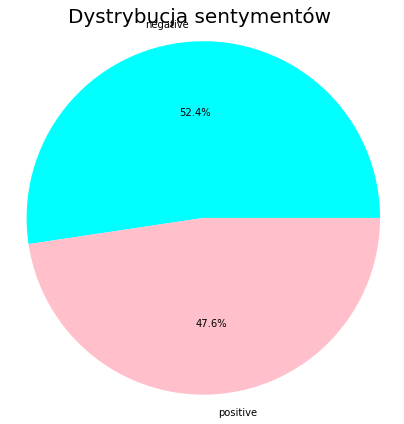

,index,sentiments
0,negative,72163
1,positive,65644


In [ ]:
emotion = {0: "negative",
           1: "positive"}

words["sentiments"] = words["cluster_value"].map(emotion)

fig = plt.gcf()
fig.set_size_inches(7,7)
colors = ["cyan","pink","yellow"]
df_pie=words["sentiments"].value_counts().reset_index()
plt.pie(df_pie["sentiments"], labels = df_pie["index"], radius=2, colors=colors, autopct="%1.1f%%")
plt.axis('equal')
plt.title("Dystrybucja sentymentów ", fontsize=20)
plt.show()
df_pie

In [ ]:
from math import nan
def get_sentiments(x, sent_dict):
    total = 0
    count = 0
    test = x["clean_text"]
    for t in test:
        if words_dict.get(t):
            total += int(sent_dict.get(t))
        count+=1 
    if count == 0:
     avg = 0 
    else:
      avg = total/count

    #print(avg)
    sentiment = 0 if avg < 0.5 else 1
    return sentiment

In [ ]:
words_dict = dict(zip(words.words, words.cluster_value))

In [ ]:
df["sentiment"] = df.apply(get_sentiments, args=(words_dict,), axis=1)

In [ ]:
df["sentiment"].value_counts()

0    396734
1    202113
Name: sentiment, dtype: int64

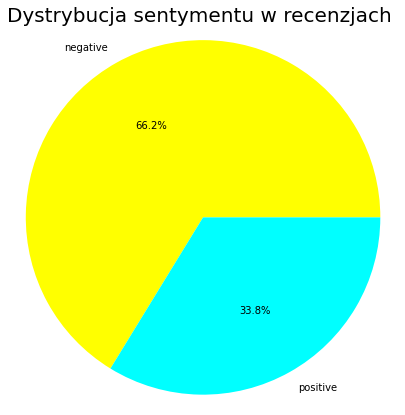

,index,sentiments_val
0,negative,396734
1,positive,202113


In [ ]:
emotion = {0: "negative",
           1: "positive"}

df["sentiments_val"] = df["sentiment"].map(emotion)
df_pie = df["sentiments_val"].value_counts().reset_index()
fig = plt.gcf()
fig.set_size_inches(7,7)
colors = ["yellow","cyan","pink"]
plt.pie(df_pie["sentiments_val"],labels= df_pie["index"],radius=2,autopct="%1.1f%%", colors=colors)
plt.axis('equal')
plt.title("Dystrybucja sentymentu w recenzjach ", fontsize=20)
#plt.savefig("images/Sentiment_Distribution.png")
plt.show()
df_pie

# 2 KROK - Wybieramy 3 modele ML, na których trenujemy dane i pokazujemy wyniki wykorzystując confusion matrix i roc curve.


In [ ]:
df[:2]

,tweets,clean_text,cleaned_text,sentiment,sentiments_val
0,"Kiedy #coronavirus dotrze do Polski, napotka o...","[coronavirus, dotrze, polski, napotka, op, zna...",coronavirus dotrze polski napotka op znakomici...,1,positive
1,Kolejni Polacy chcą wrócić z Wuhan https://t.c...,"[kolejni, polacy, chc, wr, wuhan]",kolejni polacy chc wr wuhan,0,negative


In [ ]:
X=df.cleaned_text
Y=df.sentiment

In [ ]:
#podział na zbiór treningowy i testowy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =42) # żeby zachować losowość i umożliwić odtworzenie tych samych ustawień, definiujemy random state

In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectorizer.fit(X_train)
print('No. of feature_words: ', len(vectorizer.get_feature_names()))

No. of feature_words:  500000


In [ ]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
def model_Evaluate(model):
  # Predykcja danych na danych testowych
  y_pred = model.predict(X_test)

  # Wyświetlenie metryk ewaluacji na podstawie predykcji i ground truth (faktycznych etykiet)
  print(classification_report(y_test, y_pred))

  # Obliczamy i wyświetlamy confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['Negative','Positive']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names, group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

### Naive Bayes - Bernoulli (dla klasyfikacji binarnej)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93     19722
           1       0.87      0.84      0.86     10221

    accuracy                           0.90     29943
   macro avg       0.90      0.89      0.89     29943
weighted avg       0.90      0.90      0.90     29943



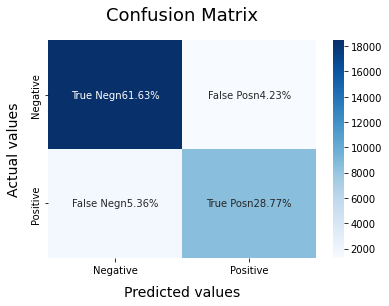

In [ ]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

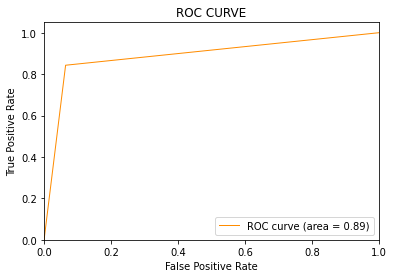

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### Linear Suppor Vector

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     19722
           1       0.93      0.91      0.92     10221

    accuracy                           0.95     29943
   macro avg       0.94      0.94      0.94     29943
weighted avg       0.95      0.95      0.95     29943



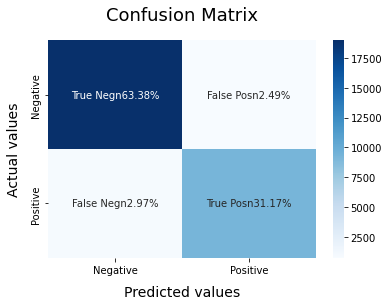

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

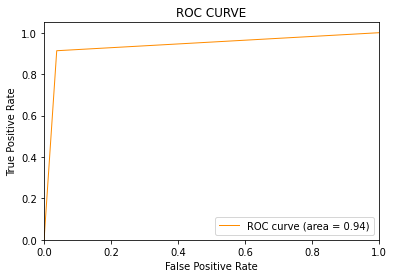

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

###Logistic Regression

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     19722
           1       0.93      0.88      0.90     10221

    accuracy                           0.94     29943
   macro avg       0.93      0.92      0.93     29943
weighted avg       0.94      0.94      0.93     29943



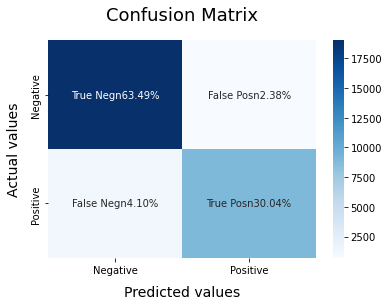

In [ ]:
LRmodel = LogisticRegression(max_iter = 1000)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

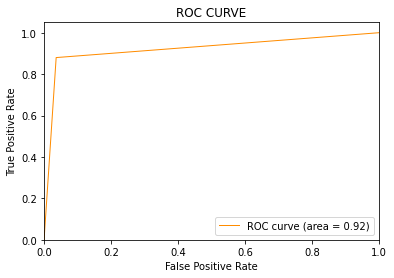

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()